#### - Sobhan Moradian Daghigh
#### - 12/4/2021
#### - ML - EX02 - Q3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import random
import operator

#### Reading data

In [89]:
iris = datasets.load_iris()
dataset = pd.DataFrame(data= np.c_[iris.data, iris.target], columns= iris.feature_names + ['target'])
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [90]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


<!-- #### Normalizing -->

In [91]:
# scaler = Normalizer().fit(dataset.iloc[:, :-1])
# normalized_dataset = scaler.transform(dataset.iloc[:, :-1])
# normalized_dataset = pd.DataFrame(normalized_dataset, columns=dataset.columns[:-1])
# normalized_dataset['target'] = dataset.iloc[:, -1]
# normalized_dataset

#### Implementation of  cross validation spliter

In [92]:
def cross_validation(dataset, k_folds=10):
    # Shuffling the dataset
    shuffled = dataset.sample(frac=1)
    remind = shuffled.shape[0] % k_folds
    shuffled = shuffled.iloc[:-remind, :] if remind != 0 else shuffled
    return np.array_split(shuffled, k_folds)

#### As a test:

In [93]:
cross_vals = cross_validation(normalized_dataset)
cross_vals[0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
51,0.745498,0.372749,0.524178,0.174726,1.0
76,0.764673,0.314865,0.539769,0.157433,1.0
113,0.692552,0.303751,0.607502,0.243001,2.0
49,0.812284,0.536107,0.227439,0.032491,0.0
47,0.795948,0.553703,0.242245,0.034606,0.0


#### Implementation of euclidean distance

In [94]:
def euclideanDistance(vectorA, vectorB):
    distance = 0
    for i in range(len(vectorA) - 1):
        distance += np.power(np.subtract(vectorA[i], vectorB[i]), 2)
    return np.sqrt(distance)

#### Implementation of KNNClassifier

In [95]:
class kNNClassifier:
    
    def __init__(self, k_neighbors):
        self.k = k_neighbors
    
    def fit(self, train):
        self.train = train

    def getNeighbors(self, test):
        
        distances = []
        for i, trainRow in self.train.iterrows():
            distances.append([trainRow, euclideanDistance(test, trainRow), self.train.iloc[:, -1][i]])
            distances.sort(key=operator.itemgetter(1))

        neighbors = []
        for index in range(self.k):
            neighbors.append(distances[index])
        return neighbors
        
    def predict(self, test):
        
        self.test = test
        predictions = []
        
        for i, testRow in self.test.iterrows():
            neighbors = self.getNeighbors(testRow)
            output= [row[-1] for row in neighbors]
            prediction = max(set(output), key=output.count)
            predictions.append(prediction)
        
        return predictions

#### Find the optimal k_neighbors using cross validation 

In [116]:
cross_vals = cross_validation(normalized_dataset)

Maximum accuracy: 0.980 at K = 3


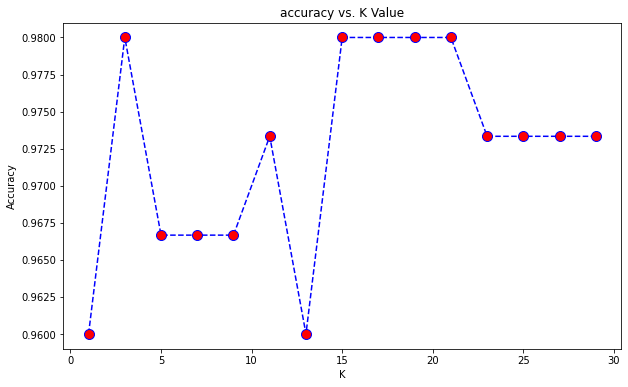

In [117]:
k_range = 31
acc = []
acc_index = []

for i in range(1,k_range, 2):
    accus = []
    for fold in cross_vals:
        train = normalized_dataset[~normalized_dataset.index.isin(fold.index)]
        test = fold

        knn = kNNClassifier(k_neighbors=i)        
        knn.fit(train)
        predictions = knn.predict(test)

        accuracy = accuracy_score(test.iloc[:, -1], predictions)
        accus.append(accuracy)

    max_accu = np.mean(accus)
    acc.append(max_accu)
    acc_index.append(i)
    
plt.figure(figsize=(10,6))
plt.plot(acc_index, acc, color = 'blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy: {:.3f} at K = {}".format(max(acc), np.multiply(acc.index(max(acc)), 2) + 1))

#### So the winner k is 3.

#### Part B:

#### Split data into 80% of train and 20% of test.

In [118]:
x_train, x_test, y_train, y_test = train_test_split(normalized_dataset.iloc[:, :-1], normalized_dataset.iloc[:, -1], train_size=0.8, shuffle=True)

In [119]:
train = pd.DataFrame(x_train)
train['target'] = y_train
test = pd.DataFrame(x_test)
test['target'] = y_test

In [120]:
knn = kNNClassifier(k_neighbors=3)
knn.fit(train)
ts_predictions = knn.predict(test)
accuracy = accuracy_score(test.iloc[:, -1], ts_predictions)
ts_MSE = mean_squared_error(y_test, ts_predictions)
ts_RMSE = mean_squared_error(y_test, ts_predictions, squared=False)
ts_MAE = mean_absolute_error(y_test, ts_predictions)

tr_predictions = knn.predict(train)
tr_MSE = mean_squared_error(y_train, tr_predictions)
tr_RMSE = mean_squared_error(y_train, tr_predictions, squared=False)
tr_MAE = mean_absolute_error(y_train, tr_predictions)

print('Train:')
print('MSE: {:.3f}'.format(tr_MSE))
print('RMSE: {:.3f}'.format(tr_RMSE))
print('MAE: {:.3f}'.format(tr_MAE))

print('\nTest:')
print('Accuracy: {:.3f}'.format(accuracy))
print('MSE: {:.3f}'.format(ts_MSE))
print('RMSE: {:.3f}'.format(ts_RMSE))
print('MAE: {:.3f}'.format(ts_MAE))

Train:
MSE: 0.017
RMSE: 0.129
MAE: 0.017

Test:
Accuracy: 0.967
MSE: 0.033
RMSE: 0.183
MAE: 0.033
